### 1 爬取空气质量数据

1801221564 钱一鸣

In [1]:
import time
from urllib import parse
import pandas as pd
from selenium import webdriver
#coding=utf-8 

In [2]:
def get_month_set():
    month_set = list()
    for i in range(12, 13):
        month_set.append(('2013-%s' % i))
    for i in range(1, 10):
        month_set.append(('2014-0%s' % i))
    for i in range(10, 13):
        month_set.append(('2014-%s' % i))
    for i in range(1, 10):
        month_set.append(('2015-0%s' % i))
    for i in range(10, 13):
        month_set.append(('2015-%s' % i))
    for i in range(1, 10):
        month_set.append(('2016-0%s' % i))
    for i in range(10, 13):
        month_set.append(('2016-%s' % i))
    for i in range(1, 10):
        month_set.append(('2017-0%s' % i))
    for i in range(10, 13):
        month_set.append(('2017-%s' % i))
    for i in range(1, 10):
        month_set.append(('2018-0%s' % i))
    for i in range(10, 13):
        month_set.append(('2018-%s' % i))
    for i in range(1, 10):
        month_set.append(('2019-0%s' % i))
    for i in range(10, 13):
        month_set.append(('2019-%s' % i))
    for i in range(1, 10):
        month_set.append(('2020-0%s' % i))
   
    return month_set

In [3]:
driver = webdriver.PhantomJS(executable_path=r'phantomjs-2.1.1-windows\bin\phantomjs.exe')
base_url = 'https://www.aqistudy.cn/historydata/daydata.php?city='

headers = { 'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36' }

month_set = get_month_set()
city = '北京'
file_name = city + 'aqi' + '.csv'
fp = open(file_name, 'w')
fp.write('%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%('date','AQI','qLevel','PM25','PM10','SO2','CO','NO2','O3_8h'))#表头
for i in range(len(month_set)):
        str_month = month_set[i]
        weburl = ('%s%s&month=%s' % (base_url, parse.quote(city), str_month))
        driver.get(weburl)
        dfs = pd.read_html(driver.page_source,header=0)[0]
        time.sleep(1)#防止页面一带而过，爬不到内容
        for j in range(0,len(dfs)):
            date = dfs.iloc[j,0]
            aqi = dfs.iloc[j,1]
            qLevel = dfs.iloc[j,2]
            pm25 = dfs.iloc[j,3]
            pm10 = dfs.iloc[j,4]
            so2 = dfs.iloc[j,5]
            co = dfs.iloc[j,6]
            no2 = dfs.iloc[j,7]
            o3 = dfs.iloc[j,8]
            print(date)
            print(aqi)
            fp.write(('%s,%s,%s,%s,%s,%s,%s,%s,%s\n' % (date,aqi,qLevel,pm25,pm10,so2,co,no2,o3)))
            print('%d---%s,%s---DONE' % (city.index(city), city, str_month))
fp.close()
driver.quit()
print ('爬虫已完成！')


2013-12-02
142
0---北京,2013-12---DONE
2013-12-03
86
0---北京,2013-12---DONE
2013-12-04
109
0---北京,2013-12---DONE
2013-12-05
56
0---北京,2013-12---DONE
2013-12-06
169
0---北京,2013-12---DONE
2013-12-07
291
0---北京,2013-12---DONE
2013-12-08
223
0---北京,2013-12---DONE
2013-12-09
26
0---北京,2013-12---DONE
2013-12-10
45
0---北京,2013-12---DONE
2013-12-11
30
0---北京,2013-12---DONE
2013-12-12
29
0---北京,2013-12---DONE
2013-12-13
66
0---北京,2013-12---DONE
2013-12-14
56
0---北京,2013-12---DONE
2013-12-15
64
0---北京,2013-12---DONE
2013-12-16
134
0---北京,2013-12---DONE
2013-12-17
80
0---北京,2013-12---DONE
2013-12-18
45
0---北京,2013-12---DONE
2013-12-19
63
0---北京,2013-12---DONE
2013-12-20
45
0---北京,2013-12---DONE
2013-12-21
82
0---北京,2013-12---DONE
2013-12-22
179
0---北京,2013-12---DONE
2013-12-23
166
0---北京,2013-12---DONE
2013-12-24
269
0---北京,2013-12---DONE
2013-12-25
219
0---北京,2013-12---DONE
2013-12-26
30
0---北京,2013-12---DONE
2013-12-27
23
0---北京,2013-12---DONE
2013-12-28
31
0---北京,2013-12---DONE
2013-12-29
78
0---

### 2 数据分析与可视化

In [4]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置加载的字体名
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
#coding=utf-8 

In [5]:
#雾霾数据
aqi = pd.read_csv('北京aqi.csv',encoding='gbk')
aqi['date'] = pd.to_datetime(aqi.date,format = "%Y-%m-%d") 
aqi = aqi.sort_values(by = 'date')

In [6]:
aqi.head()

,date,AQI,qLevel,PM25,PM10,SO2,CO,NO2,O3_8h
0,2013-12-02,142,轻度污染,109,138,61,2.6,88,11
1,2013-12-03,86,良,64,86,38,1.6,54,45
2,2013-12-04,109,轻度污染,82,101,42,2.0,62,23
3,2013-12-05,56,良,39,56,30,1.2,38,52
4,2013-12-06,169,中度污染,128,162,48,2.5,78,15


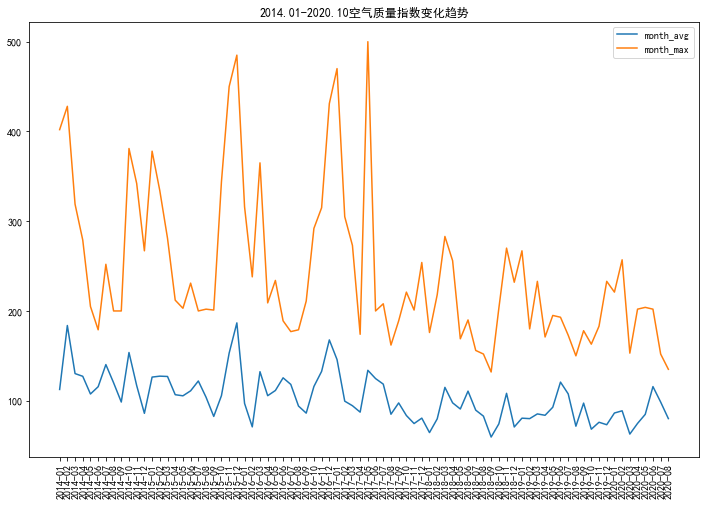

In [7]:
#画出每个月平均、以及最大值的aqi随时间的变化趋势
months = pd.date_range(start='2014-01',end='2020-10',freq = 'M')
month_names = []
month_avgaqi = []
month_maxaqi = []
for i in range(len(months)):
    if i == 0:
        data = aqi[aqi.date <= months[i]]
    else:
        data = aqi[(aqi.date > months[i-1]) & (aqi.date <= months[i])]
    if  data.shape[0] == 0:
        continue
    month_names.append(str(months[i])[0:7])
    month_avgaqi.append(np.mean(data.AQI.values))
    month_maxaqi.append(np.max(data.AQI.values))
plt.rcParams['figure.figsize'] = (12, 8) # 设置figure_size尺寸
x = [i for i in range(len(month_names))]
plt.plot(x,month_avgaqi,label = 'month_avg')
plt.plot(x,month_maxaqi,label = 'month_max')
plt.xticks(x,month_names,rotation=90)
plt.title('2014.01-2020.10空气质量指数变化趋势')
plt.legend()
plt.show()

从上图可以看出，空气质量指数整体呈下降趋势。对于每一年来说，每年的秋冬季（集中在10月-次年2月）AQI值较高，空气质量较差。

In [9]:
#画出每年各个污染等级的占比饼图。
uniq_levels = np.unique(aqi.qLevel)
print(uniq_levels)

['严重污染' '中度污染' '优' '无' '良' '轻度污染' '重度污染']


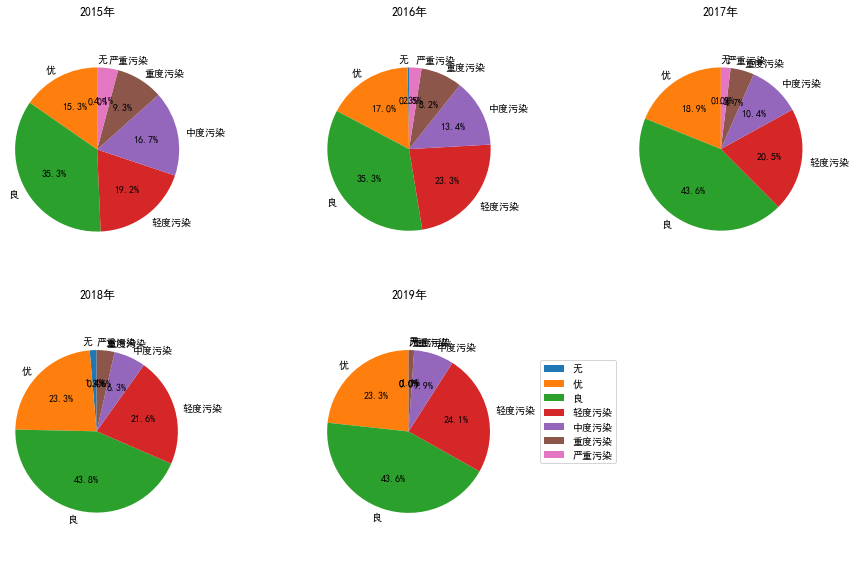

In [16]:
levels = ['无','优', '良', '轻度污染','中度污染','重度污染','严重污染']
years = pd.date_range(start='2014-01',end='2020-01',freq = 'Y')
res_year = {}
for i in range(len(years)):
    res_year[str(years[i])[0:4]] = []
    if i == 0:
        data = aqi[aqi.date <= years[i]]
    else:
        data = aqi[(aqi.date > years[i-1]) & (aqi.date <= years[i])]
    if data.shape[0] == 0:
        continue
    for level in levels:
        data_level = data[data.qLevel == level]
        res_year[str(years[i])[0:4]].append(len(data_level))

fig1 = plt.subplot(231)
plt.pie(res_year['2015'],labels=levels,autopct='%1.1f%%',shadow=False,startangle=90)
plt.axis('equal')
plt.title("2015年")

fig2 = plt.subplot(232)
plt.pie(res_year['2016'],labels=levels,autopct='%1.1f%%',shadow=False,startangle=90)
plt.axis('equal')
plt.title("2016年")

fig3 = plt.subplot(233)
plt.pie(res_year['2017'],labels=levels,autopct='%1.1f%%',shadow=False,startangle=90)
plt.axis('equal')
plt.title("2017年")


fig4 = plt.subplot(234)
plt.pie(res_year['2018'],labels=levels,autopct='%1.1f%%',shadow=False,startangle=90)
plt.axis('equal')
plt.title("2018年")

fig5 = plt.subplot(235)
plt.pie(res_year['2019'],labels=levels,autopct='%1.1f%%',shadow=False,startangle=90)#startangle表示饼图的起始角度
plt.axis('equal') #这行代码加入饼图不会画成椭圆
plt.title("2019年")

plt.legend(bbox_to_anchor=(1.2,0.8))
plt.tight_layout() #布局方法
plt.show() #显示方法


从上图可以看出，空气质量状况逐年好转，污染天数占比逐年减少，严重污染天数到2018年几乎为0。